In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split


In [3]:
df=pd.read_csv("peticoes_tokenizadas.csv",index_col=0)

In [4]:
# Suponha que seu DataFrame seja chamado "df" e que a coluna de destino seja "classe"
X = df.drop('classe', axis=1)
y = df['classe']

# Divide os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve,confusion_matrix

k=10
# Criar uma instância do classificador KNN
knn = KNeighborsClassifier(n_neighbors=k)

# Treinar o modelo
knn.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
Y_pred = knn.predict(X_test)

# Avaliar a precisão do modelo
accuracy = accuracy_score(y_test, Y_pred)



/home/juliano/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/juliano/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/juliano/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         7
           5       1.00      1.00      1.00         5
           6       1.00      0.33      0.50         3
           7       0.67      1.00      0.80         4
           8       1.00      1.00      1.00         3
           9       0.87      1.00      0.93        13
          10       0.00      0.00      0.00         2
          11       1.00      1.00      1.00         6
          12       1.00      1.00      1.00         4
          13       1.00      1.00      1.00         2
          14       1.00      1.00      1.00         7
          15       1.00      1.00      1.00         1
          16       1.00      1.00      1.00         5
          17       1.00    

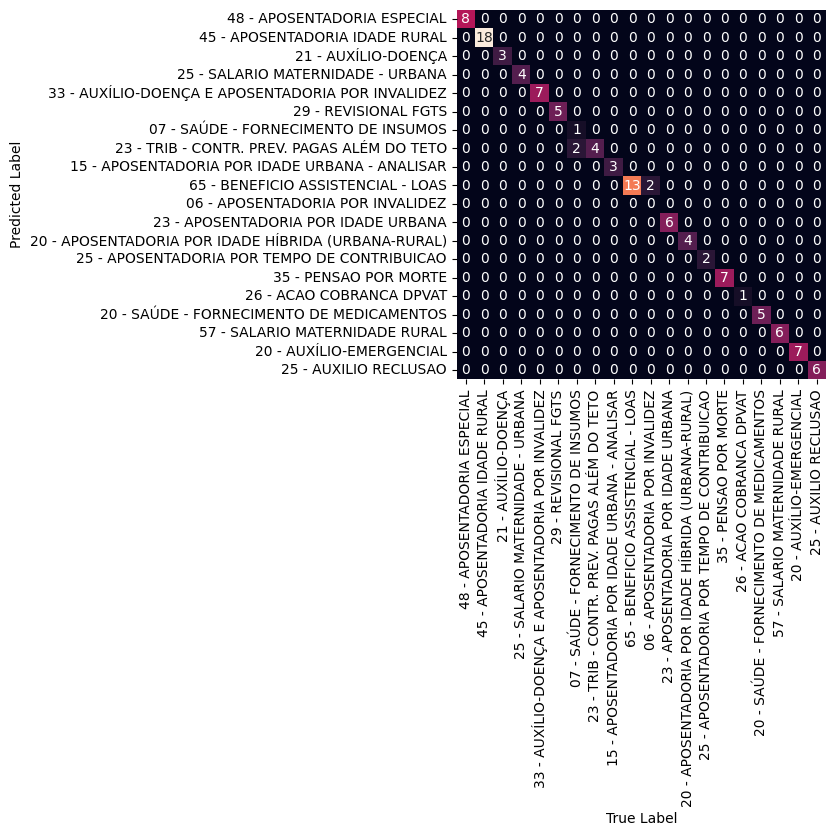

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

classe_match = {'48 - APOSENTADORIA ESPECIAL': 0,
                '45 - APOSENTADORIA IDADE RURAL': 1,
                '21 - AUXÍLIO-DOENÇA': 2,
                '25 - SALARIO MATERNIDADE - URBANA': 3,
                '33 - AUXÍLIO-DOENÇA E APOSENTADORIA POR INVALIDEZ': 4,
                '29 - REVISIONAL FGTS': 5,
                '07 - SAÚDE - FORNECIMENTO DE INSUMOS': 6,
                '23 - TRIB - CONTR. PREV. PAGAS ALÉM DO TETO': 7,
                '15 - APOSENTADORIA POR IDADE URBANA - ANALISAR': 8,
                '65 - BENEFICIO ASSISTENCIAL - LOAS': 9,
                '06 - APOSENTADORIA POR INVALIDEZ': 10,
                '23 - APOSENTADORIA POR IDADE URBANA': 11,
                '20 - APOSENTADORIA POR IDADE HÍBRIDA (URBANA-RURAL)': 12,
                '25 - APOSENTADORIA POR TEMPO DE CONTRIBUICAO': 13,
                '35 - PENSAO POR MORTE': 14,
                '26 - ACAO COBRANCA DPVAT': 15,
                '20 - SAÚDE - FORNECIMENTO DE MEDICAMENTOS': 16,
                '57 - SALARIO MATERNIDADE RURAL': 17,
                '20 - AUXÍLIO-EMERGENCIAL': 18,
                '25 - AUXILIO RECLUSAO': 19}

# imprimir relatório
print(classification_report(y_test, Y_pred))


# Imprime a matriz de confusão
mat = confusion_matrix(y_test, Y_pred)

sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=list(classe_match.keys()), yticklabels=list(classe_match.keys()))
plt.xlabel('True Label')
plt.ylabel("Predicted Label")
plt.show()